In [176]:
import csv
from pandas import DataFrame
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
from scipy.spatial.distance import cdist
from kneed import KneeLocator
%matplotlib inline

In [177]:
# tabela = []
# with open('dados.csv') as csvfile: 
#     reader = csv.reader(csvfile) 
#     for row in reader:
#         tabela.append(row)
# Data = tabela

#df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'linguagem'])


# Importar Dados

In [178]:
tabela = []
with open('bin.csv') as csvfile: 
    reader = csv.reader(csvfile) 
    for row in reader:
        tabela.append(row)

In [179]:
Data = tabela
df = DataFrame(Data,columns=['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'curso', 'contatoLinguagem', 'linguagem', 'razao'])

In [209]:
df['idadeDecimal'] = df.idade.apply(lambda x: format(int(x, 2)))
df['idadeDecimal'] = df['idadeDecimal'].astype(int)
df

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,contatoLinguagem,linguagem,razao,idadeDecimal,kClasses
0,001,0010110,0001,0001,001,010,0,0,011,010,0,001,0010,1,01110,00001,22,0
1,001,0100001,0010,1010,001,010,0,1,001,001,1,001,0010,0,00000,00110,33,1
2,001,0010110,0001,0001,001,001,0,1,010,011,0,001,0011,1,00111,01000,22,0
3,001,0010101,0001,0001,001,010,0,1,001,100,1,001,0100,1,01111,00010,21,0
4,011,0011110,0001,0001,001,001,0,0,001,010,0,001,0101,1,01001,00010,30,0
5,001,0010110,0001,0001,001,010,0,1,010,010,0,010,0001,1,00101,00110,22,0
6,001,0010110,0001,0001,001,001,0,1,001,010,0,001,0110,1,00010,00010,22,0
7,001,0010110,0001,1011,001,010,1,1,001,010,0,001,0011,0,00000,00010,22,0
8,001,0010001,0001,0001,001,011,0,1,011,010,0,001,0001,1,00000,01001,17,0
9,010,0010010,0001,1000,001,001,0,1,010,010,1,011,0010,1,10000,00010,18,0


In [210]:
# df2 = df.curso.str.split(',').apply(pd.Series)
# df2.index = df.set_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem']).index
# df2.stack().reset_index(['sexo', 'idade', 'cidadeNatal', 'cidadeReside', 'estadoCivil', 'cor', 'meioTransporte', 'transportePublico', 'salario', 'ingles', 'atividadeRemunerada', 'escola', 'linguagem'])

# Determinar o K

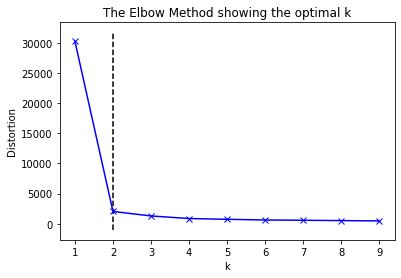

In [211]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

# Grafico
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

# Mostra o K
kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
kn.knee

plt.show()

In [212]:
kmeans = KMeans(n_clusters=kn.knee).fit(df)
centroids = kmeans.cluster_centers_
centroids

array([[1.82608696e+00, 1.04238261e+04, 1.03130435e+02, 1.36130435e+02,
        2.17391304e+00, 1.47826087e+01, 2.60869565e-01, 7.39130435e-01,
        8.00000000e+00, 1.33478261e+01, 4.34782609e-01, 7.82608696e+00,
        6.66521739e+01, 7.82608696e-01, 1.25213043e+03, 4.19913043e+02,
        2.31304348e+01, 0.00000000e+00],
       [1.75000000e+01, 1.02202167e+05, 3.71666667e+01, 1.69166667e+02,
        7.16666667e+00, 7.00000000e+00, 8.33333333e-01, 6.66666667e-01,
        7.66666667e+00, 7.00000000e+00, 8.33333333e-01, 4.16666667e+00,
        7.16666667e+00, 1.66666667e-01, 1.66666667e+01, 2.25500000e+02,
        4.08333333e+01, 1.00000000e+00]])

In [213]:
kmeans.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0])

In [214]:
df['kClasses'] = kmeans.labels_

In [215]:
#sb.pairplot(df, hue='K-classes')

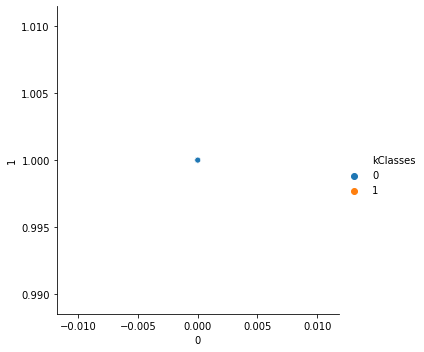

In [216]:
sb.relplot(x=0, y=1, hue="kClasses", data=df);

In [217]:
df

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,contatoLinguagem,linguagem,razao,idadeDecimal,kClasses
0,001,0010110,0001,0001,001,010,0,0,011,010,0,001,0010,1,01110,00001,22,0
1,001,0100001,0010,1010,001,010,0,1,001,001,1,001,0010,0,00000,00110,33,1
2,001,0010110,0001,0001,001,001,0,1,010,011,0,001,0011,1,00111,01000,22,0
3,001,0010101,0001,0001,001,010,0,1,001,100,1,001,0100,1,01111,00010,21,0
4,011,0011110,0001,0001,001,001,0,0,001,010,0,001,0101,1,01001,00010,30,0
5,001,0010110,0001,0001,001,010,0,1,010,010,0,010,0001,1,00101,00110,22,0
6,001,0010110,0001,0001,001,001,0,1,001,010,0,001,0110,1,00010,00010,22,0
7,001,0010110,0001,1011,001,010,1,1,001,010,0,001,0011,0,00000,00010,22,0
8,001,0010001,0001,0001,001,011,0,1,011,010,0,001,0001,1,00000,01001,17,0
9,010,0010010,0001,1000,001,001,0,1,010,010,1,011,0010,1,10000,00010,18,0


In [218]:
df.dtypes
grupo2['estadoCivil'].value_counts()


010    3
001    2
011    1
Name: estadoCivil, dtype: int64

# Dividir grupo em 2 tabelas 

In [219]:
grupo1 = df[df.kClasses==0]
grupo2 = df[df.kClasses==1]
grupo2

,sexo,idade,cidadeNatal,cidadeReside,estadoCivil,cor,meioTransporte,transportePublico,salario,ingles,atividadeRemunerada,escola,curso,contatoLinguagem,linguagem,razao,idadeDecimal,kClasses
1,001,0100001,0010,1010,001,010,0,1,001,001,1,001,0010,0,00000,00110,33,1
11,001,0101101,0100,0001,010,001,1,1,011,001,0,001,0001,0,00000,00011,45,1
13,001,0101110,0001,0001,010,010,1,0,011,010,1,001,0011,1,00100,01010,46,1
15,001,0100000,0001,0001,011,010,1,0,001,010,1,001,0010,0,00000,00011,32,1
18,100,0110000,0110,0001,010,001,1,1,011,010,1,010,0010,0,00000,00100,48,1
21,001,0101001,0001,0001,001,010,1,1,011,010,1,011,0001,0,00000,00111,41,1


# Estado Civil dos grupos

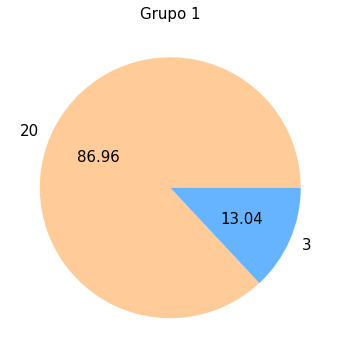

In [299]:
labels=['Solteiro', 'Casado']
colors = ['#ffcc99', '#66b3ff']
values = grupo1["estadoCivil"].value_counts()
grupo1["estadoCivil"].value_counts().plot.pie(fontsize = 15, colors = colors,autopct='%.2f', labels=values, figsize=(6, 6))
#plt.legend(labels,loc='best', fontsize = 12)
plt.title('Grupo 1', size = 15)
plt.ylabel('')
plt.savefig('estadoCivil1.png', transparent = True)

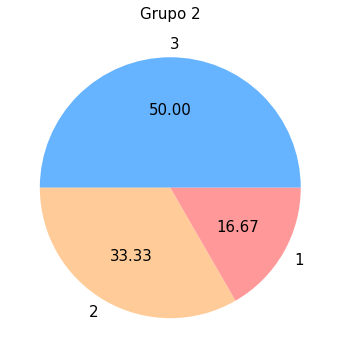

In [313]:
labels=['Casado','Solteiro', 'União Estável']
colors = ['#66b3ff','#ffcc99','#ff9999']
values = grupo2["estadoCivil"].value_counts()
grupo2["estadoCivil"].value_counts().plot.pie(fontsize = 15, colors = colors, autopct='%.2f', labels=values, figsize=(6, 6))
#plt.legend(labels,loc="upper right", fontsize = 12)
plt.title('Grupo 2', size = 15)
plt.ylabel('')
plt.savefig('estadoCivil2.png', transparent = True)

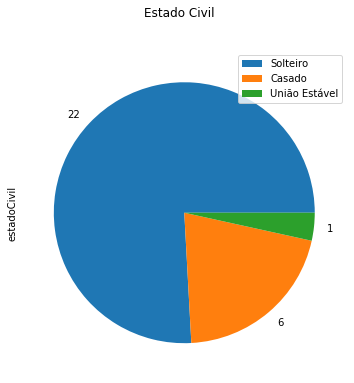

In [246]:
labels=['Solteiro', 'Casado', 'União Estável']
values = df["estadoCivil"].value_counts()
df["estadoCivil"].value_counts().plot.pie(subplots=True, title="Estado Civil", labels=values, figsize=(6, 6))
plt.legend(labels,loc='best')

# Cidade onde reside

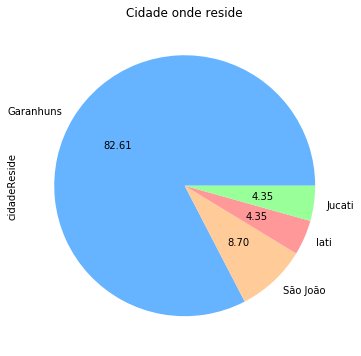

In [223]:
colors = ['#66b3ff','#ffcc99','#ff9999','#99ff99']
grupo1["cidadeReside"].value_counts().plot.pie(colors = colors, title="Cidade onde reside", labels=['Garanhuns', 'São João', 'Iati', 'Jucati'], autopct='%.2f', figsize=(6, 6))

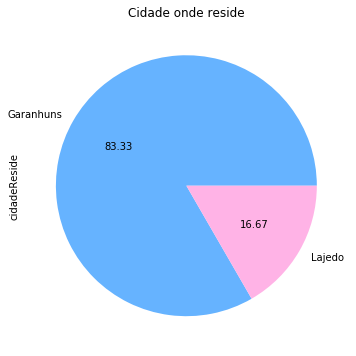

In [224]:
colors = ['#66b3ff','#ffb3e6']
grupo2["cidadeReside"].value_counts().plot.pie(colors = colors, title="Cidade onde reside", labels=['Garanhuns', 'Lajedo'], autopct='%.2f', figsize=(6, 6))

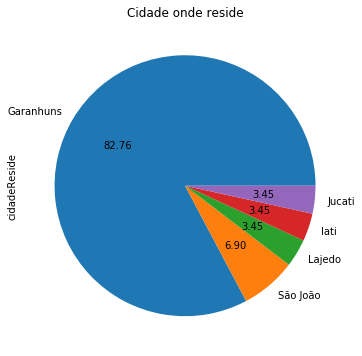

In [225]:
df["cidadeReside"].value_counts().plot.pie(title="Cidade onde reside", labels=['Garanhuns', 'São João', 'Lajedo', 'Iati', 'Jucati'], autopct='%.2f', figsize=(6, 6))

# Nivel de inglês

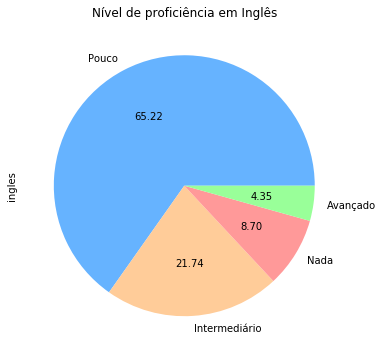

In [226]:
colors = ['#66b3ff','#ffcc99','#ff9999','#99ff99']
grupo1["ingles"].value_counts().plot.pie(colors = colors, title="Nível de proficiência em Inglês", labels=['Pouco', 'Intermediário', 'Nada', 'Avançado'], autopct='%.2f', figsize=(6, 6))

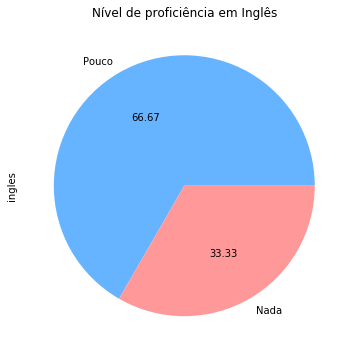

In [227]:
colors = ['#66b3ff','#ff9999']
grupo2["ingles"].value_counts().plot.pie(colors = colors, title="Nível de proficiência em Inglês", labels=['Pouco', 'Nada'], autopct='%.2f', figsize=(6, 6))

In [228]:
grupo2['contatoLinguagem'].value_counts()

0    5
1    1
Name: contatoLinguagem, dtype: int64

# Local onde concluiu o ensino médio

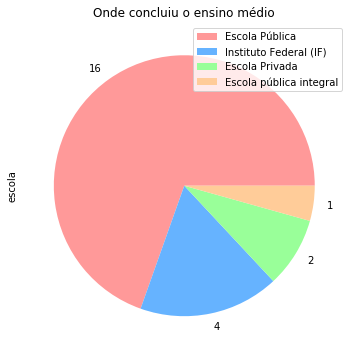

In [245]:
labels=['Escola Pública', 'Instituto Federal (IF)', 'Escola Privada', 'Escola pública integral']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
values = grupo1["escola"].value_counts()
grupo1["escola"].value_counts().plot.pie(colors = colors, title="Onde concluiu o ensino médio", labels=values, figsize=(6, 6))
plt.legend(labels,loc='best')

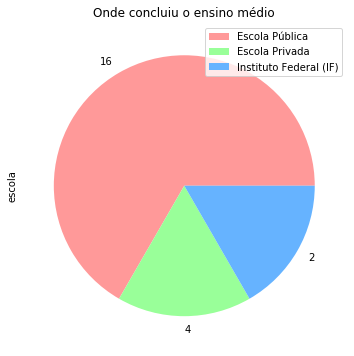

In [244]:
labels=['Escola Pública', 'Escola Privada', 'Instituto Federal (IF)']
colors = ['#ff9999','#99ff99','#66b3ff']
values = grupo1["escola"].value_counts()
grupo2["escola"].value_counts().plot.pie(colors = colors, title="Onde concluiu o ensino médio", labels=values, figsize=(6, 6))
plt.legend(labels,loc='best')

# Contato com linguagem de programação

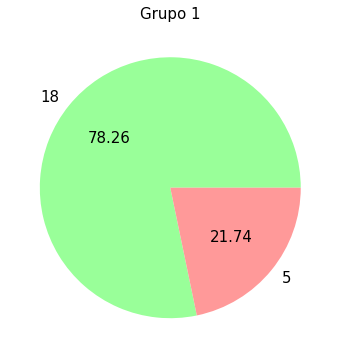

In [295]:
labels=['Sim', 'Não']
colors = ['#99ff99','#ff9999']
values = grupo1["contatoLinguagem"].value_counts()
grupo1["contatoLinguagem"].value_counts().plot.pie(fontsize = 15, colors = colors, autopct='%.2f',labels=values, figsize=(6, 6))
#plt.legend(labels,loc='best', fontsize = 12)
plt.title('Grupo 1', size = 15)
plt.ylabel('')
plt.savefig('linguagem1.png', transparent = True)

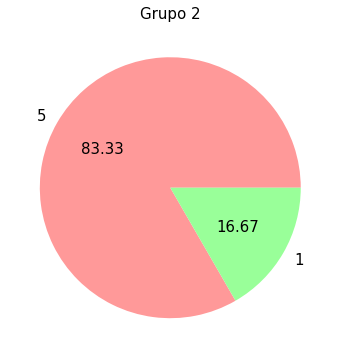

In [314]:
labels=['Não', 'Sim']
colors = ['#ff9999','#99ff99']
values = grupo2["contatoLinguagem"].value_counts()
grupo2["contatoLinguagem"].value_counts().plot.pie(fontsize = 15, colors = colors, autopct='%.2f',labels=values, figsize=(6, 6))
#plt.legend(labels,loc='best', fontsize = 12)
plt.title('Grupo 2', size = 15)
plt.ylabel('')
plt.savefig('linguagem2.png', transparent = True)

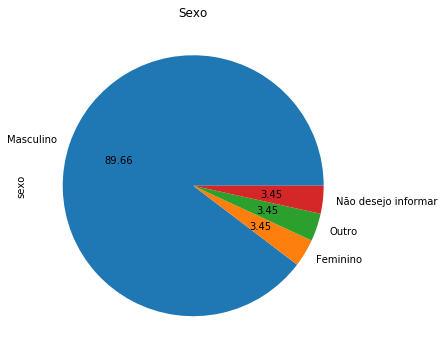

In [233]:
df["sexo"].value_counts().plot.pie(title="Sexo",labels=['Masculino', 'Feminino', 'Outro', 'Não desejo informar'], autopct='%.2f',  figsize=(6, 6))


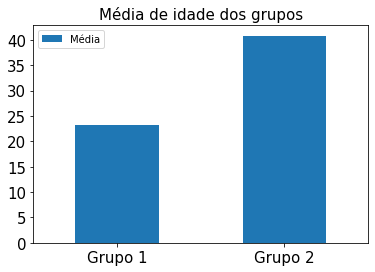

In [288]:

media1 = grupo1.idadeDecimal.mean()
media2 = grupo2.idadeDecimal.mean()
mediaIdade = pd.DataFrame({'Grupos':['Grupo 1', 'Grupo 2'], 'Média':[media1, media2]})
ax = mediaIdade.plot.bar(fontsize = 15,x='Grupos', y='Média', rot=0)
plt.title('Média de idade dos grupos', size = 15)
plt.xlabel('')
plt.savefig('MediaIdade.png', transparent = True)

In [235]:
grupo2.idadeDecimal.describe()

count     6.000000
mean     40.833333
std       6.853223
min      32.000000
25%      35.000000
50%      43.000000
75%      45.750000
max      48.000000
Name: idadeDecimal, dtype: float64

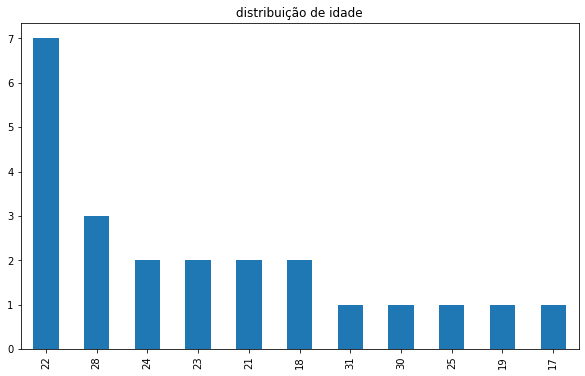

In [236]:
grupo1["idadeDecimal"].value_counts().plot.bar(title="distribuição de idade", figsize=(10, 6))

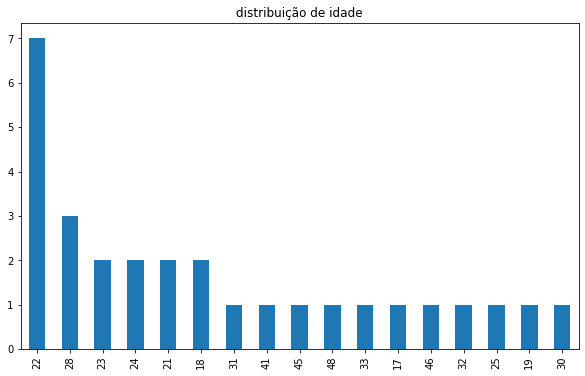

In [155]:
df["idadeDecimal"].value_counts().plot.bar(title="distribuição de idade", figsize=(10, 6))

In [156]:
df["idadeDecimal"].value_counts()

22    7
28    3
23    2
24    2
21    2
18    2
31    1
41    1
45    1
48    1
33    1
17    1
46    1
32    1
25    1
19    1
30    1
Name: idadeDecimal, dtype: int64

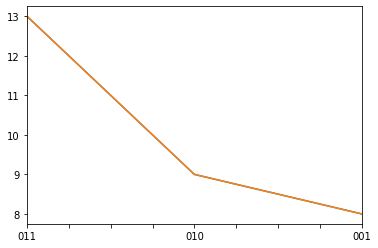

In [109]:
salarios = df['salario'].value_counts()
salarios.plot ()
df['salario'].value_counts().plot()